In [1]:
import cf_xarray
import gribberish
import xarray as xr
import cfgrib

ds = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='gribberish')

#ds_truth = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='cfgrib', filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'})
ds

/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'rasterio' loading failed:
dlopen(/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so, 0x0002): Library not loaded: /opt/homebrew/opt/gdal/lib/libgdal.31.dylib
  Referenced from: <096C1844-80F2-3F2D-82B6-4FA692E96B85> /Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so
  Reason: tried: '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/usr/local/lib/libgdal.31.dylib' (no such file), '/usr/lib/libgdal.31.dylib' (no such file, not in dyld cache), '/opt/homebrew/Cellar/gdal/3.6.2/lib/libgdal.31.dylib' (no such file), '/S

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
2256 2256 -2574 2
48
2256 2256 -2574 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
2437 2435 -2476 2
48
2437 2435 -2476 2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]
2511 2511 -2658 2
48
2511 2511 -2658 2
[0, 0, 0, 

<xarray.Dataset>
Dimensions:                                                                                                  (
                                                                                                              time: 1,
                                                                                                              lat: 721,
                                                                                                              lon: 1440)
Coordinates:
  * time                                                                                                     (time) datetime64[ns] ...
  * lat                                                                                                      (lat) float64 ...
  * lon                                                                                                      (lon) float64 ...
Data variables: (12/90)
    TMP@specificaltitudeabovemeansealevel_1829&2023-01-12T12:00:00+00:00                                     (time, lat, lon) float64 ...
    UGRD@sigmalevel_1&2023-01-12T12:00:00+00:00                                                              (time, lat, lon) float64 ...
    VGRD@specifiedheightlevelaboveground_20&2023-01-12T12:00:00+00:00                                        (time, lat, lon) float64 ...
    vis@groundorwater_0&2023-01-12T12:00:00+00:00                                                            (time, lat, lon) float64 ...
    DPT@specifiedheightlevelaboveground_2&2023-01-12T12:00:00+00:00                                          (time, lat, lon) float64 ...
    TMP&2023-01-12T06:00:00+00:00                                                                            (time, lat, lon) float64 ...
    ...                                                                                                       ...
    PRES@tropopause_0&2023-01-12T12:00:00+00:00                                                              (time, lat, lon) float64 ...
    TMP@tropopause_0&2023-01-12T12:00:00+00:00                                                               (time, lat, lon) float64 ...
    REFD@specifiedheightlevelaboveground_1000&2023-01-12T12:00:00+00:00                                      (time, lat, lon) float64 ...
    UGRD@specifiedheightlevelaboveground_50&2023-01-12T12:00:00+00:00                                        (time, lat, lon) float64 ...
    POT@sigmalevel_1&2023-01-12T12:00:00+00:00                                                               (time, lat, lon) float64 ...
    UGRD@specifiedheightlevelaboveground_40&2023-01-12T12:00:00+00:00                                        (time, lat, lon) float64 ...
Attributes:
    meta:     created with gribberish

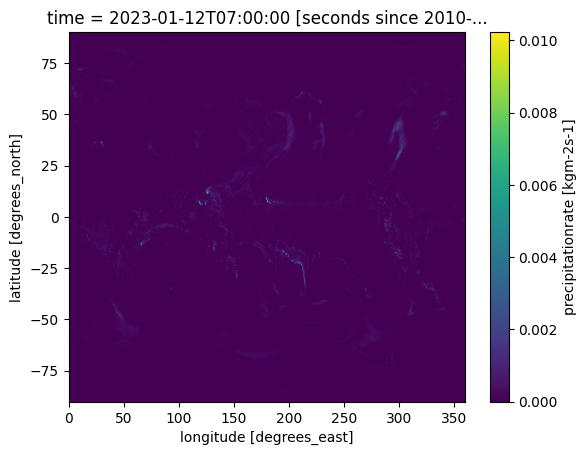

In [7]:
ds['PRATE@groundorwater_0&2023-01-12T06:00:00+00:00'].plot()

In [ ]:
print(f'truth: {float(gust_truth.sel(latitude=41, longitude=-71, method="nearest").values)}')
print(f'compare: {float(gust.sel(lat=41, lon=-71, method="nearest").values)}')
print('-----')
print(f'truth: {float(gust_truth.isel(latitude=0, longitude=2).values)}')
print(f'compa: {float(gust.isel(lat=0, lon=2).values)}')

In [ ]:
gust.plot()